# 1. LTV

In [46]:
import pandas as pd
import numpy as np


In [47]:
data = pd.read_csv('MMM_data.csv')

In [48]:
data[data['결제 완료'] == 'Yes']

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26
5,1002,2024-02-27,YouTube Ads,2024-03-07,홈 > 카테고리 > 제품 목록 > 상품 상세 > 주문 확인 > 결제,Yes,Yes,토스,Mobile,2024-07-15
10,1003,2024-01-30,Instagram Ads,2024-03-05,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,카카오페이,Mobile,2024-07-26
...,...,...,...,...,...,...,...,...,...,...
5347,2985,2024-07-09,Naver Shopping,2024-07-22,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 상품 상세 >...,Yes,Yes,무통장 입금,Mobile,2024-07-22
5348,2988,2024-07-12,Naver Shopping,2024-07-31,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,무통장 입금,Desktop,2024-07-31
5349,2989,2024-07-01,Instagram Ads,2024-07-07,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 상품 상세 > 결...,Yes,Yes,토스,Mobile,2024-07-26
5350,2989,2024-07-01,Google Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 상품 상세 >...,Yes,Yes,무통장 입금,Mobile,2024-07-26


/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
/opt/conda/pubenvs/skku_dm

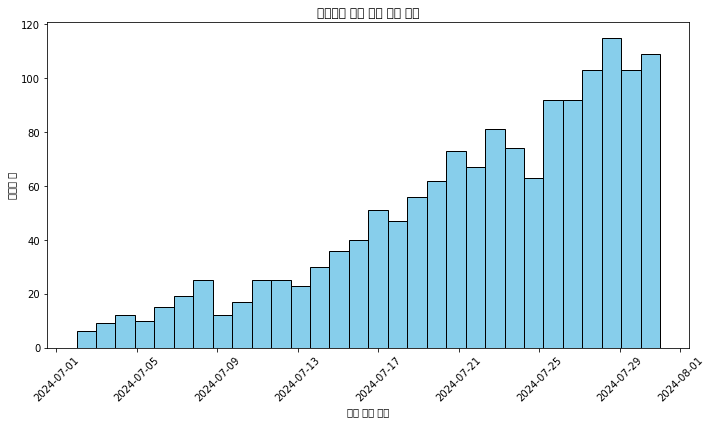

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 기존 데이터프레임을 새로운 변수에 할당
df_eda = data.copy()

# '방문 날짜'를 datetime 형식으로 변환 (이미 datetime 형식이면 생략 가능)
df_eda['방문 날짜'] = pd.to_datetime(df_eda['방문 날짜'])

# 사용자 ID별 최종 방문 날짜 추출
last_visit_dates = df_eda.groupby('사용자 ID')['방문 날짜'].max().reset_index()

# 최종 방문 날짜를 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(last_visit_dates['방문 날짜'], bins=30, color='skyblue', edgecolor='black')
plt.title('아이디별 최종 방문 날짜 분포')
plt.xlabel('최종 방문 날짜')
plt.ylabel('사용자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
len(data['사용자 ID'].unique())

1492

## 1) 평균 구매 금액


In [51]:

# 결제 완료된 트랜잭션만 필터링
completed_transactions = data[data['결제 완료'] == 'Yes']
# 고객별 평균 구매 금액 계산 (결제 금액 컬럼이 있으면 그것을 사용)
avg_order_value = completed_transactions.groupby('사용자 ID')['결제 방식'].count()  # 결제 금액을 사용해야 함


## 2) 구매 빈도 계산

In [52]:
# 고객별 구매 빈도 계산 (중복된 사용자 ID 기반)
purchase_frequency = completed_transactions.groupby('사용자 ID')['방문 날짜'].nunique()


## 3) 고객 유지 기간


In [53]:
# 가입 날짜와 마지막 방문 날짜 차이를 사용해 고객 유지 기간 계산
data['가입 날짜'] = pd.to_datetime(data['가입 날짜'])
data['마지막 방문 날짜'] = pd.to_datetime(data['마지막 방문 날짜'])
data['고객 유지 기간'] = (data['마지막 방문 날짜'] - data['가입 날짜']).dt.days

# 고객별 유지 기간 평균 계산
customer_lifespan = data.groupby('사용자 ID')['고객 유지 기간'].mean()


In [55]:
from datetime import timedelta

# 이탈 기준: 30일 동안 재방문하지 않으면 이탈로 간주
inactivity_threshold = 30  # 30일

# 현재 시각을 2024년 8월 20일로 설정
current_date = pd.Timestamp('2024-08-20')

# 이탈 여부를 30일 기준으로 다시 계산
data['이탈 여부'] = data['마지막 방문 날짜'].apply(lambda x: 'Yes' if (current_date - x).days > 30 else 'No')

# 업데이트된 이탈 여부 확인
data[['사용자 ID', '마지막 방문 날짜', '이탈 여부']].head()



,사용자 ID,마지막 방문 날짜,이탈 여부
0,1001,2024-07-26,No
1,1001,2024-07-26,No
2,1001,2024-07-26,No
3,1001,2024-07-26,No
4,1001,2024-07-26,No


In [57]:
data[data['이탈 여부'] == 'Yes']

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,고객 유지 기간,이탈 여부
5,1002,2024-02-27,YouTube Ads,2024-03-07,홈 > 카테고리 > 제품 목록 > 상품 상세 > 주문 확인 > 결제,Yes,Yes,토스,Mobile,2024-07-15,139,Yes
6,1002,2024-02-27,YouTube Ads,2024-04-04,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Tablet,2024-07-15,139,Yes
7,1002,2024-02-27,Instagram Ads,2024-04-14,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Mobile,2024-07-15,139,Yes
8,1002,2024-02-27,Facebook Ads,2024-07-15,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Tablet,2024-07-15,139,Yes
44,1012,2024-01-11,Google Search,2024-01-14,홈 > 카테고리 > 제품 목록 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-13,184,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5311,2941,2024-07-06,Naver Shopping,2024-07-19,홈 > 검색 > 제품 상세 > 장바구니,Yes,No,-,Mobile,2024-07-19,13,Yes
5331,2965,2024-07-06,Coupang Ads,2024-07-17,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-17,11,Yes
5333,2971,2024-07-16,Instagram Ads,2024-07-19,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,삼성페이,Desktop,2024-07-19,3,Yes
5341,2978,2024-07-09,Instagram Ads,2024-07-12,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-12,3,Yes


## 4) 이탈율 계산


In [58]:
# 이탈율 계산 (이탈 여부 Yes인 사용자 비율)
churn_rate = data['이탈 여부'].value_counts(normalize=True).get('Yes', 0)


In [61]:
churn_rate

0.3645697218592496

## 5) LTV 계산


In [59]:
# LTV = 평균 구매 금액 * 구매 빈도 * 고객 유지 기간
ltv = avg_order_value * purchase_frequency * customer_lifespan


In [60]:
ltv

사용자 ID
1001    1134.0
1002     139.0
1003     712.0
1004     130.0
1005       NaN
         ...  
2992       NaN
2994       NaN
2995       NaN
2996       NaN
2998       NaN
Length: 1492, dtype: float64

# 2. 이탈율 예측